# Week 6 (Tree-based Models)

## 2.1. Decision Tree

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [24]:
# 데이터 로드 및 전처리
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1.1 max_depth 파라미터를 변경하면 트리의 구조와 성능이 어떻게 변할까요?

depth가 커질수록 정확도는 올라가는데, 5 이상부터는 정확도가 더 높아지지 않음

In [25]:
from sklearn.metrics import accuracy_score

# 결정 트리 모델 생성 및 학습
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.95
Test Accuracy: 1.0


In [26]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.975
Test Accuracy: 1.0


In [32]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9666666666666667
Test Accuracy: 1.0


    max_depth  min_samples_split  min_samples_leaf  train_acc  test_acc
24        4.0                 10                 1   0.958333       1.0
25        4.0                 10                 2   0.950000       1.0
21        4.0                  5                 2   0.966667       1.0
22        4.0                  5                 5   0.950000       1.0
28        4.0                 20                 1   0.958333       1.0
26        4.0                 10                 5   0.950000       1.0
29        4.0                 20                 2   0.950000       1.0
30        4.0                 20                 5   0.950000       1.0
20        4.0                  5                 1   0.975000       1.0
18        4.0                  2                 5   0.950000       1.0


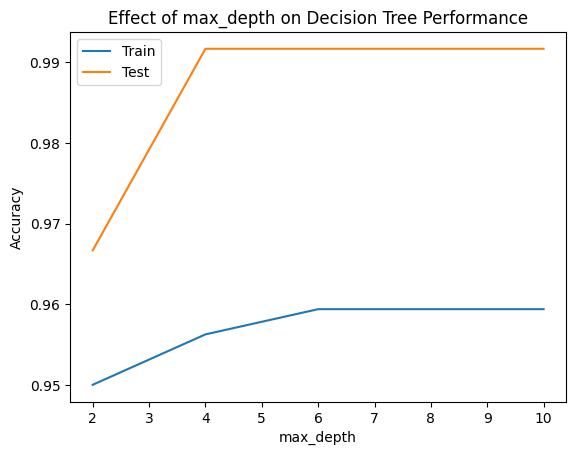

In [4]:
# 파라미터 후보 설정
max_depths = [2, 4, 6, 8, 10, None]
min_samples_splits = [2, 5, 10, 20]
min_samples_leafs = [1, 2, 5, 10]

results = []

for depth in max_depths:
    for split in min_samples_splits:
        for leaf in min_samples_leafs:
            model = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf,
                random_state=42
            )

            # 학습
            model.fit(X_train, y_train)

            # 예측
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            # 성능 저장
            results.append({
                "max_depth": depth,
                "min_samples_split": split,
                "min_samples_leaf": leaf,
                "train_acc": accuracy_score(y_train, y_pred_train),
                "test_acc": accuracy_score(y_test, y_pred_test)
            })

# 결과를 DataFrame으로 보기 좋게 정리
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results.sort_values(by="test_acc", ascending=False).head(10))

# 시각화 (예: max_depth별 성능 비교)
plt.plot(df_results.groupby("max_depth")["train_acc"].mean(), label="Train")
plt.plot(df_results.groupby("max_depth")["test_acc"].mean(), label="Test")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Decision Tree Performance")
plt.legend()
plt.show()


### Q1.2 'gini'와 'entropy' 기준의 차이는 무엇이며, 결과에 어떤 영향을 미칠까요?

노드 분할 시 불순도를 계산하는 방식 두 가지
1. gini ; 무작위로 하나를 뽑았을 때 잘못 분류되었을 확률. 이진분류시 0~ 0.5의 값을 가짐. 약간 빠름
2. entropy ; 정보이론에 기반하여 (이진분류시) 0~1의 값을 가짐 .클래스 불균형에 더 민감
-> 둘 모두 결과에 큰 차이 없음

### Q1.3 각 노드의 분할 기준 어떻게 되는지 설명해보세요.

In [5]:
# 트리 시각화 (Graphviz)
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

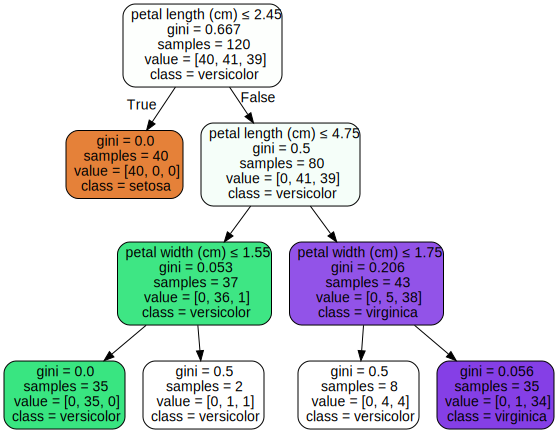

In [6]:
# 그래프 출력
graph = graphviz.Source(dot_data)
graph

1. petal length가 2.45보다 작은가
2. petal length가 4.75보다 작은가
3. petal width가 1.55보다 작은가
4. petal width가 1.75보다 작은가

## 3. 앙상블 학습: 부스팅(Boosting) 모델

Adaboost, Gradient Boosting Model은 scikit learn에서 지원하지만, LightGBM과 XGBoost의 경우는 외부 패키지를 불러와야 합니다.

Boosting 계열의 모델들은 데이터 개수가 적으면 overfitting이 일어나는 경우가 많으니, 주의해야 합니다.

In [7]:
# 필요한 패키지 로드
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

In [8]:
# 데이터 로드
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [9]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Q3.1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [10]:
# 데이터 분할
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  0.2, random_state=42)

### Q3.2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("mse: ", mse)

mse:  0.2553684927247781


### Q3.3 데이터를 `AdaBoostRegressor`에 적합해봅시다.

위와 동일

In [16]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(n_estimators=100, random_state=42)
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("mse: ", mse)

mse:  0.614478459432694


### Q3.4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("mse: ", mse)

mse:  0.2939973248643864


### Q3.5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터를 자세히 살펴보고, 자유롭게 설정해 봅시다.

Documentation
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시
https://www.geeksforgeeks.org/regression-using-lightgbm/


In [18]:
import lightgbm as lgb

lgb_r = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)
lgb_r.fit(X_train, y_train)
y_pred = lgb_r.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("mse: ", mse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
mse:  0.21484820209255617


### Q3.6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [19]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("mse: ", mse)

mse:  0.29522676196268116


### Q3.7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

Feature ranking:
MedInc: 0.5249 ± 0.0100
AveOccup: 0.1384 ± 0.0060
Latitude: 0.0889 ± 0.0110
Longitude: 0.0886 ± 0.0098
HouseAge: 0.0546 ± 0.0045
AveRooms: 0.0443 ± 0.0100
Population: 0.0306 ± 0.0032
AveBedrms: 0.0296 ± 0.0034


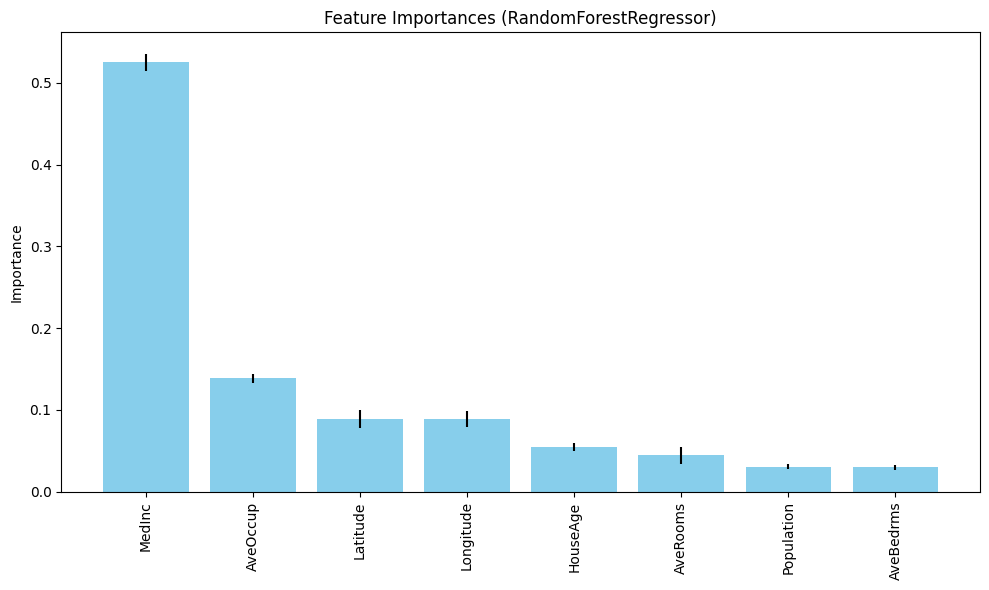

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 1. 피처 중요도
importances = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_], axis=0)

# 2. 인덱스 정렬
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns.tolist()

# 3. 결과 출력 (중요한 feature 순)
print("Feature ranking:")
for idx in indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f} ± {std[idx]:.4f}")

# 4. 그래프 시각화 (내림차순 정렬된 막대그래프)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (RandomForestRegressor)")
plt.bar(range(len(importances)), importances[indices], color="skyblue", yerr=std[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


### (BONUS) 1. Boosting 모델 각각의 특징을 정리해보세요.

- adaptive Boosting ; 오분류된 샘플에 가중치를 주고, 최종 예측은 여러 약한 학습기의 가중합으로 결정. 노이즈와 이상치에 민감. 과적합에 비교적 강함.
- Gradient Boosting ; 이전 모델의 잔차를 예측하는 새로운 모델을 순차적으로 학습. 경사하강법 아이디어 적용. 유연성 높고 성능 높음. 과적합 위험 + 속도 느림
- XGBoost ; gbm의 개선버전. l1,l2 정규화 적용하여 과적합 방지. 결측값 자동 처리. early stopping. 다만 튜닝 까다로움
- lightGBM ; xgboost의 느린 학습을 개선. 히스토그램 기반 학습 + 리프 중심 분할 전략 사용. 대규모 데이터에최적화. 더 깊은 트리 가능. 속도 매우 빠르지만 과적합 위험 큼. 소규모 데이터에는 안정성 낮음.

### (BONUS) 2. 모델 성능을 높이기 위하여 어떤 시도를 하면 좋을지 고민해보세요.

1. 새로운 파생 변수 생성하기
2. 변수 변환 필요하다면 활용 (log, ratio)
3. 피처 선택 / 차원축소 통해 노이즈 제거
4. 결측치 처리 방법 변경
5. 이상치 처리
6. 스케일링
- 하이퍼 파라미터 튜닝(grid search, optuna 등)
- cross validation 활용하기
- 과적합 방지를 위한 정규화/규제
- feature importance 분석 후 덜 중요한 피처 제거
- 모델 해석 도구 활용(shap)